# 机器学习小组大作业
***
 <center><font color=#1E90FF size=4 face="黑体">小组成员 ：张磊 孙昊 朱鹏宇 江俊锋 罗嘉熙 吴博伟 </font></center>
 
## 房价预测（更换数据-波士顿房价预测）
***
###  房价预测实验介绍
***
本实验主要是依据波士顿房价数据集，属性包括附近犯罪率、一氧化氮浓度、全值财产税率等，通过分析属性预测房价，这本质上是也是一个回归问题。


### 1. 实验所用数据集
***
本地离线更换数据集：boston_housing_data.csv

数据详情可查阅如下网址了解：
https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv

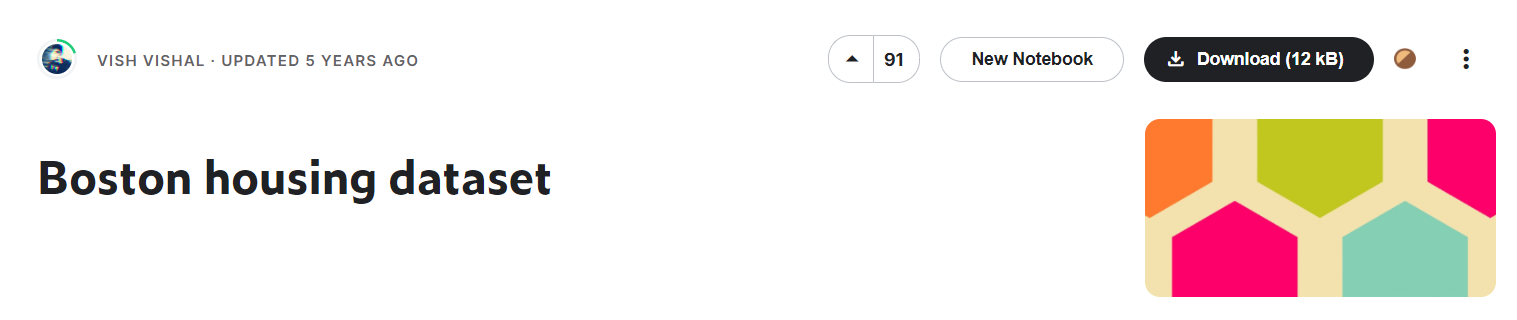

In [1]:
from IPython.display import Image
Image(filename = '.\picture\Bostion_housing.png', width=100, height=60)

实验环境要求
***
* python 3.7+Anaconda虚拟环境
* pycharm+Jupyter平台

### 2. 实验总体设计
***
本实验遵从数据挖掘的一般流程，首先对已经下载本地的数据进行读取，常规的探索后，进行数据预处理，随后直接选择sklearn模块中的决策树、随机森林、GDBT、XGBoost算法进行建模，选择出性能突出的模型做进一步的调参优化，最终确认模型，进行预测。

### 3. 实验整体方案
***

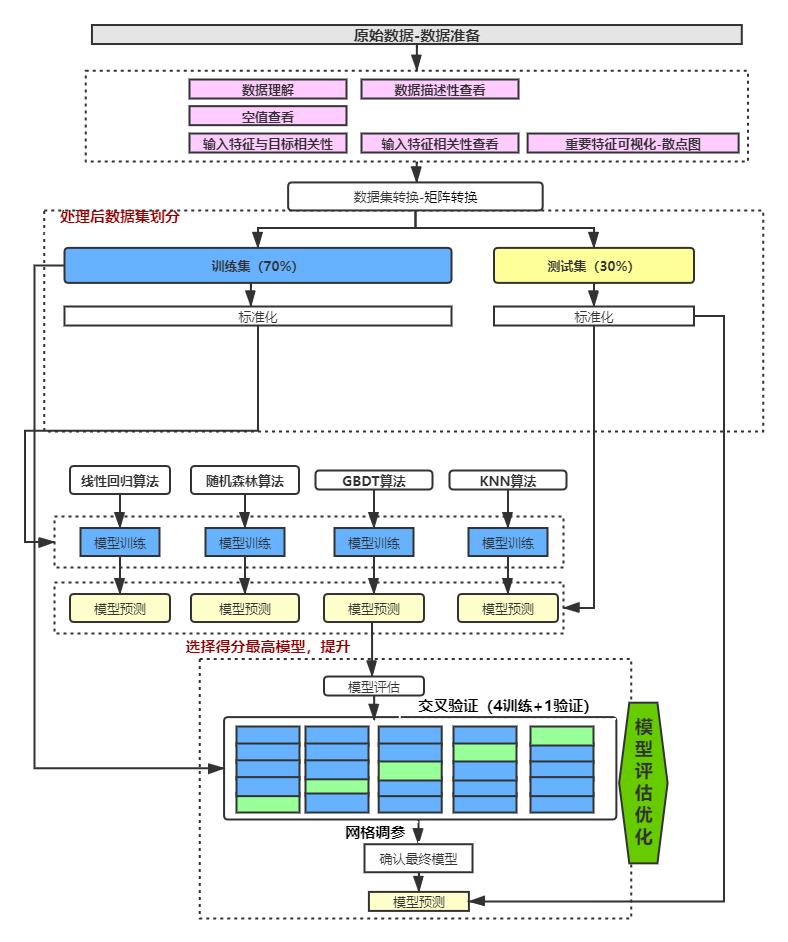

In [2]:
from IPython.display import Image
Image(filename = '.\picture\liuchengtu.png', width=100, height=60)

###  4. 实验详细设计与实现
***
####  4. 1导入实验环境
***<font color=#DC143C>本实验使用到的框架主要包括numpy，pandas，scikit-learn，matplotlib，seaborn库。scikit-learn库是Python的机器学习库，提供一些常用的机器学习算法模型及模型参数优化功能；numpy ，pandas库是Python中结构化数据处理的库，主要用于结构化数据的统计分析及操作；matplotlib，seaborn主要用于数据分析过程的可视化展示。</font>***

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
#mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
sns.set_style(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")


####  4. 2数据准备
#### 离线数据读取
##### <font color=#DC143C>这里读取的数据是与项目文件同级目录下，或同一个文件夹中。</font>

In [4]:
df = pd.read_csv("./data/boston_housing_data.csv")
#读取波士顿房价数据

#### 输出前5行数据
###### <font color=#DC143C> 查看文件头信息，了解基本的数据记录，查看每条记录具体包含哪些内容。</font>

In [5]:
print(df.sample(5))

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
169  2.44953   0.0  19.58     0  0.605  6.402  95.2  2.2625    5  403   
250  0.14030  22.0   5.86     0  0.431  6.487  13.0  7.3967    7  330   
465  3.16360   0.0  18.10     0  0.655  5.759  48.2  3.0665   24  666   
497  0.26838   0.0   9.69     0  0.585  5.794  70.6  2.8927    6  391   
136  0.32264   0.0  21.89     0  0.624  5.942  93.5  1.9669    4  437   

     PTRATIO       B  LSTAT  MEDV  
169     14.7  330.04  11.32  22.3  
250     19.1  396.28   5.90  24.4  
465     20.2  334.40  14.13  19.9  
497     19.2  396.90  14.10  18.3  
136     21.2  378.25  16.90  17.4  


##### 从上述输出结果中可以查看数据的前5行信息，包括NOX，RM，AGE，DIS，MEDV等基本房屋信息。

####  4.3 数据理解
#### 4.3.1 输出属性信息

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


##### 上述属性描述信息可以看出，所有的属性都是数值型的，记录数，和空值情况，上述信息显示所有属性都不存在空值的情况。

#### 4.3.2 输出描述信息

##### <font color=#DC143C>查看属性的统计描述信息，了解每种属性的记录数，区间范围，均值，分位值，方差，用于了解属性的分布和倾斜情况，为后续数据的分析和处理服务。</font>

In [7]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

##### 上述输出属性的统计信息，主要输出记录数量，属性均值，方差，最小值，25%分位值，50%分位值，75%分位值，和最大值，可以看出每种属性的统计信息，通过对比mean值和50%值，可以看出部分属性出现略有倾斜的情况，比如TAX，针对类似问题，若是存在空值情况，则需要通过众数进行缺失值的填充。数据预处理

#### 4.3.3 输出空值信息

In [8]:
print(df.isnull().any())
 #这里主要调用DataFrame中的isnull方法进行属性空值检测

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool


##### 从上述结果可以看出没有出现空值现象，说明属性完整情况较好。

##### 查看属性与房价之间的分布规律，用于探索单一属性与房价的变化规律，明确房价的决定因素有哪些，或哪些属性对房价有明确的营销。

#### 4.3.4 查看每种属性与房价的分布关系

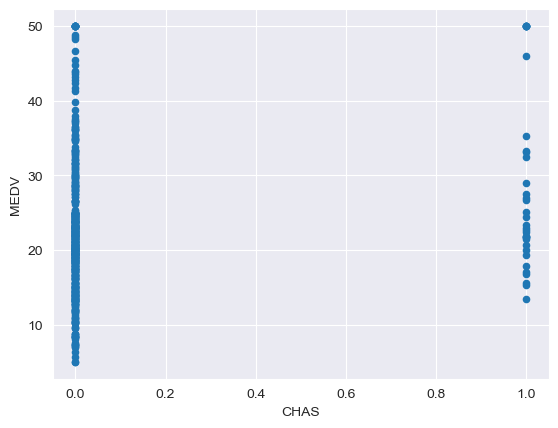

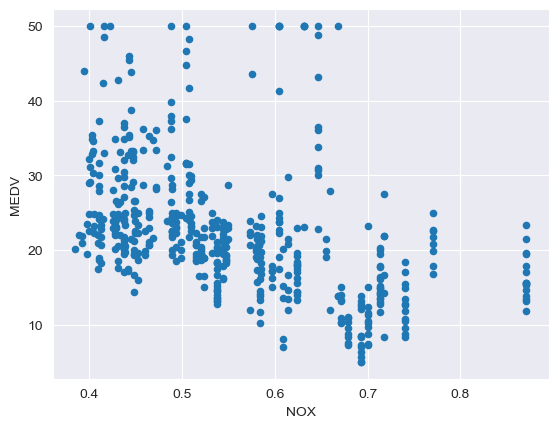

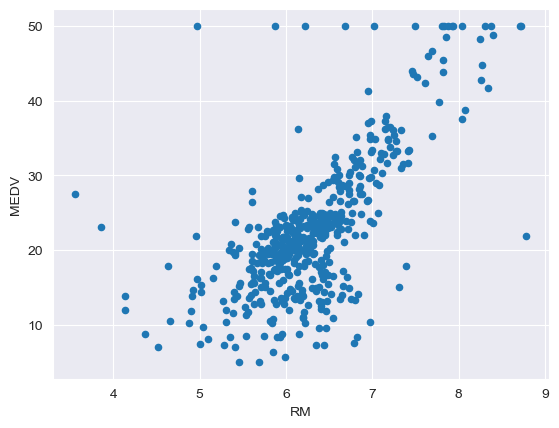

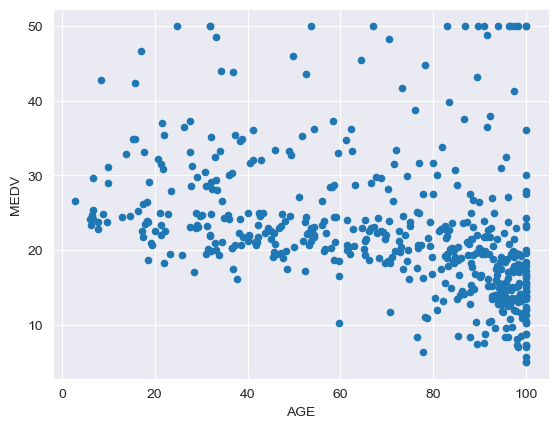

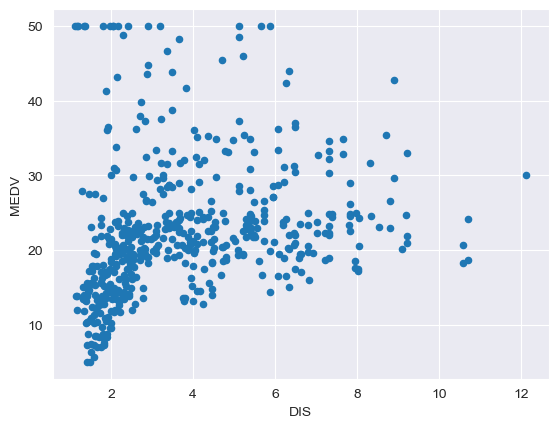

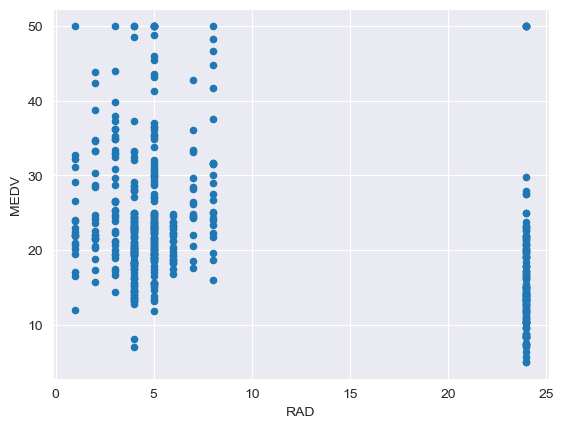

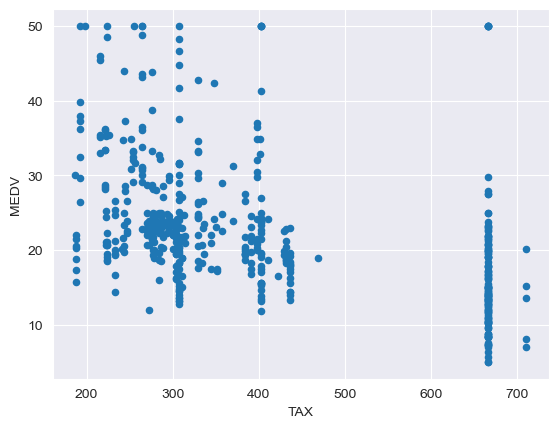

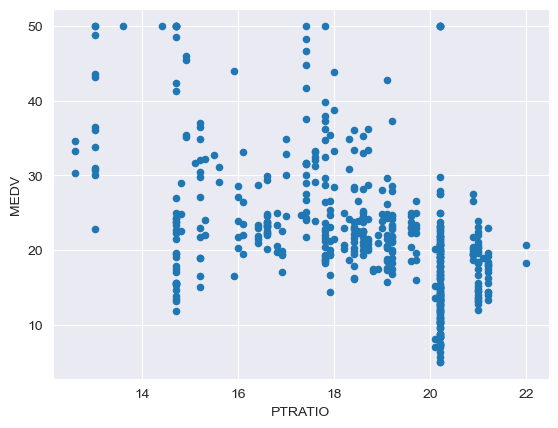

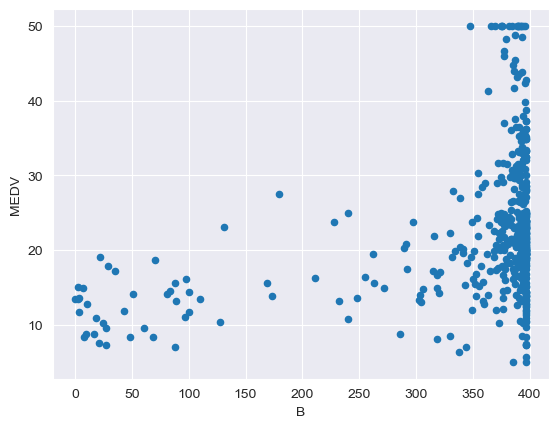

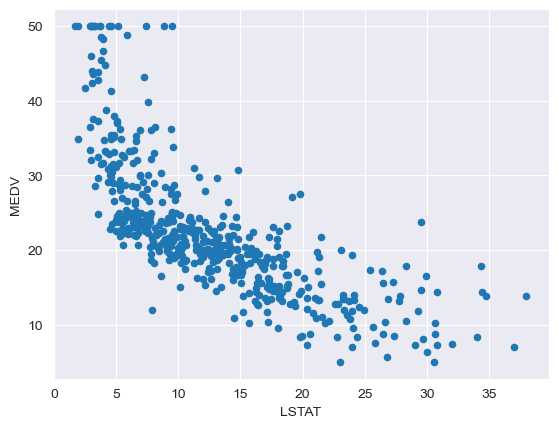

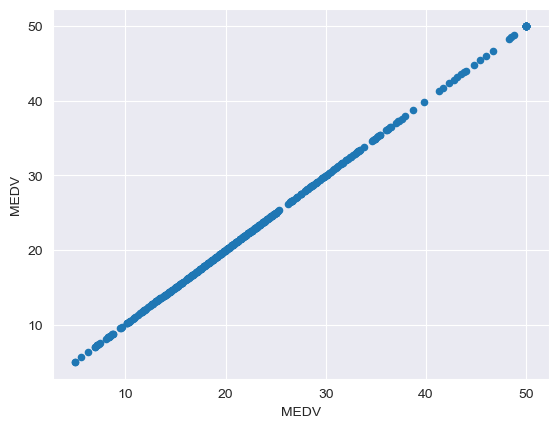

In [9]:
#获取第三列开始往后的所有属性名称，由于第一列为序号，第二列为房屋记录时间，第三列房屋价格
#因此此处从第四列开始获取属性集。
x_vars=df.columns[3:]
for x_var in x_vars:
   df.plot(kind='scatter',x=x_var,y='MEDV')

##### 上述这些图呈现了每种属性与房价的散点分布图，从图中可以看出从上述这些图可以看出，属性的分布不服从整体分布，分布规律不明显。因此无法直接分析单个属性的变化对房价预测结果的影响，即使用简单的多元线性回归算法对房价预测的效果可能会比较差，后续需要分析属性之间的相关性，用于采用相对复杂的回归模型进行预测。

#### 4.3.5 查看属性之间的相关性

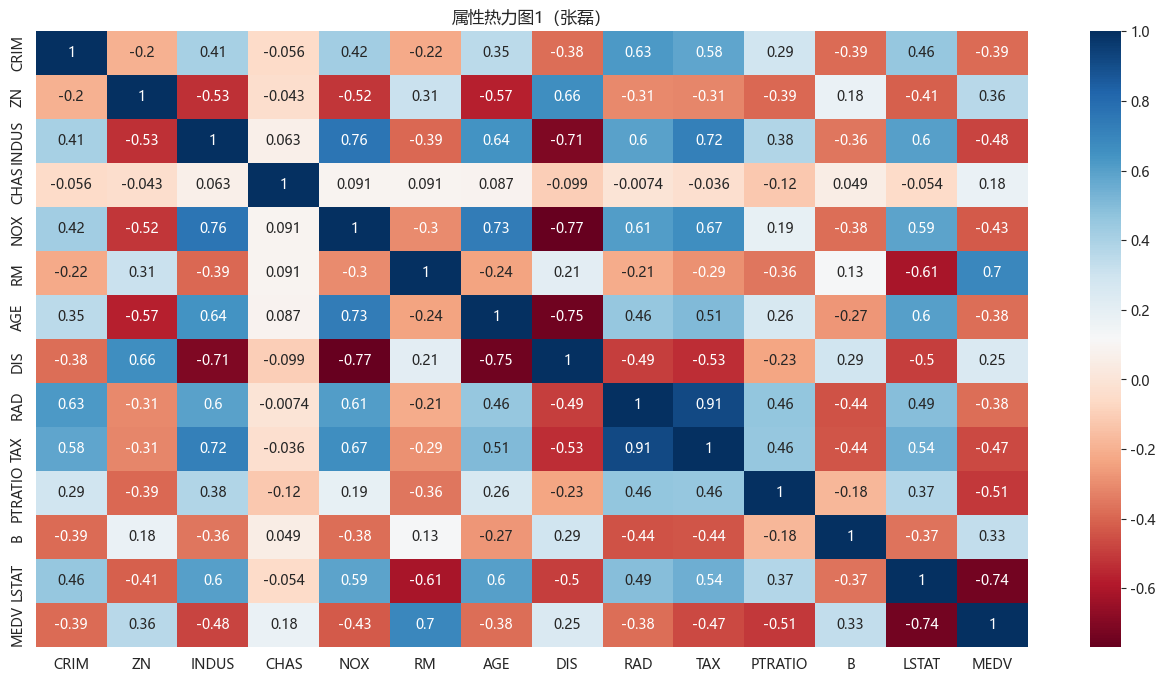

In [10]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
#计算属性间的相关系数图
corr = df.corr()
#绘制属性相关系数的热力图
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True,cmap="RdBu")
title("属性热力图1（张磊）")
plt.show()

##### 上图显示属性自身的相关性为1，说明任何属性与其本身之间是强相关的，而属性之间相关系数都不大，说明属性之间普遍相关性不高，但是部分属性具备相关性挖掘的可能。

#### 4.3.6 显示下三角的相关系数，用于呈现属性之间的相关系数图，简化相关系数图。

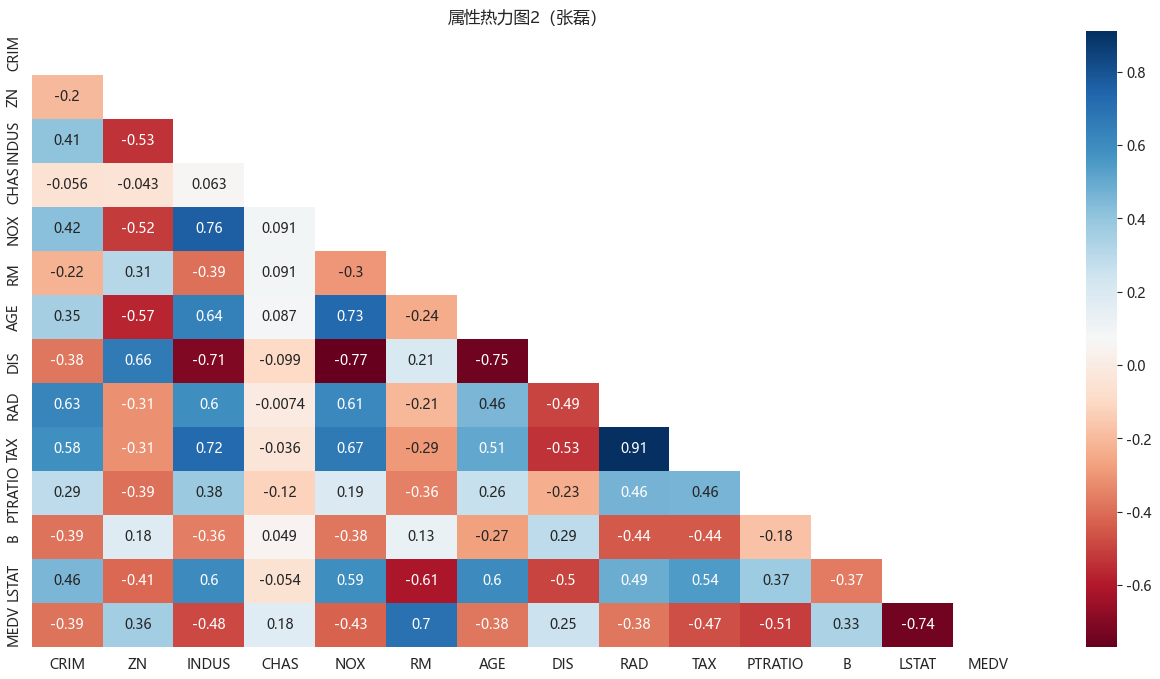

In [11]:

plt.figure(figsize=(16,8))
mask = np.zeros_like(corr,dtype=bool)
# Create a msk to draw only lower diagonal corr map
mask[np.triu_indices_from(mask)] = True
sns.set_style(style="white")
#对相关系数图进行下三角显示
sns.heatmap(corr,annot=True,cmap="RdBu",mask=mask)
from pylab import *
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
title("属性热力图2（张磊）")
plt.show ()


#### 4.3.7 输出相关系数大于0.5的属性

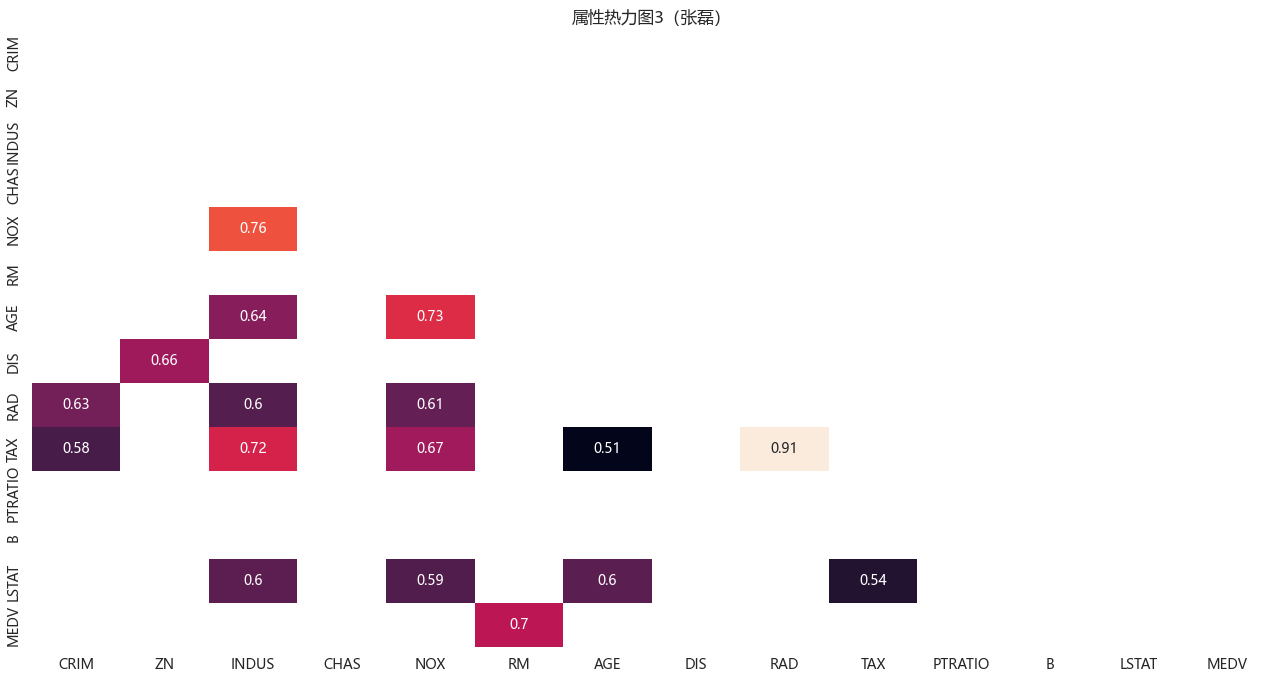

In [12]:

plt.figure(figsize=(16,8))
mask = np.zeros_like(corr[corr>=.5],dtype=bool)

# Create a msk to draw only lower diagonal corr map
mask[np.triu_indices_from(mask)] = True
sns.set_style(style="white")
sns.heatmap(corr[corr>=.5],annot=True,mask=mask,cbar=False)
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
title("属性热力图3（张磊）")
plt.show()


#### 4.3.8 分析B与房价的分布关系

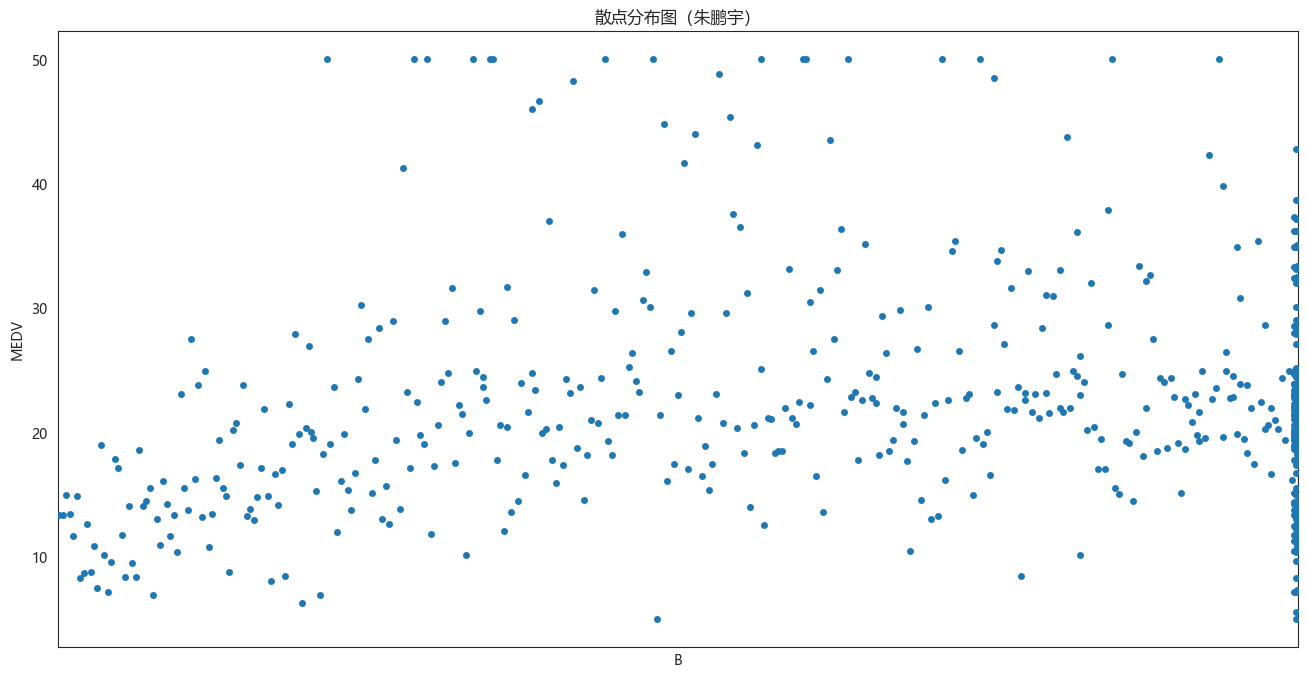

In [13]:
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
#绘制各区域具体的价格散点分布情况，了解每个区域的价格分布区间
plt.figure(figsize=(16,8))
sns.swarmplot(x=df.B,y=df.MEDV)
plt.xticks([])
plt.title("散点分布图（朱鹏宇）")
plt.show()

##### 从图中可以看出，属性B与房价的分布关系较为分散，可以考虑将该属性其去掉


###   5. 模型训练数据处理
***
##### <font color=#DC143C>由于本案例是依据房屋的属性信息对房屋的价格进行预测，预测的是连续变量，因此这里主要采用回归模型进行预测。在回归模型中最常用的算法有线性回归，随机森林，GBDT，KNN，决策树等模型，这里首先采用线性回归进行数据分析。</font>

#### 5.1 配置训练数据与测试数据

In [14]:
#使用线性回归模型进行数据分析
from sklearn.linear_model import LinearRegression

X = df.drop(['MEDV','B'],axis=1)
X = X.values
y = df['MEDV']
#导入数据拆分算法train_test_split进行数据集的拆分
from sklearn.model_selection import train_test_split
#将数据拆分为训练数据和测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#### 5.2 数据标准化处理
##### <font color=#DC143C>由于不同属性之间，区间范围差异较大，因此这里对属性特征进行标准化操作。</font>

In [15]:
#调用数据标准化模块
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
#对训练数据属性集进行标准化处理
X_train= sc.transform(X_train)
#对测试数据属性集进行标准化处理
X_test = sc.transform(X_test)

###  6. 数据建模分析
***
#### 6. 1采用线性回归建立回归模型

0.7094491346346692


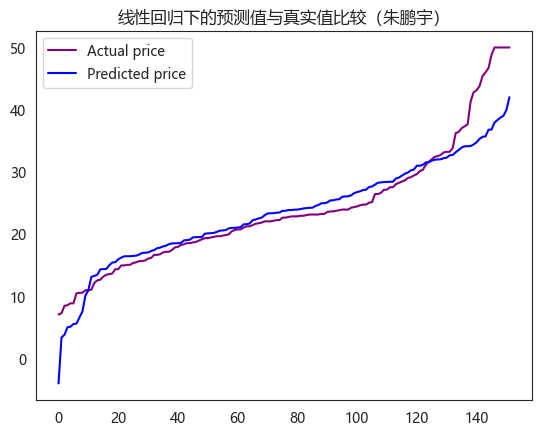

In [16]:
from sklearn.linear_model import LinearRegression
from pylab import *
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
model = LinearRegression()
#采用线性回归进行模型训练
model.fit(X_train, y_train)
#let us predict

#获取模型预测结果
y_pred=model.predict(X_test)
y_t=sorted(y_test)
y_p=sorted(y_pred)
plt.plot(y_t[-200:],color='purple',label="Actual price")
plt.plot(y_p[-200:],color='b',label="Predicted price")
plt.title("线性回归下的预测值与真实值比较（朱鹏宇）")
plt.legend()

#打印模型评分结果
print (model.score(X_test, y_test ))

##### 模型评估值反映的是模型的整体预测效果，该值的取值范围是[0,1]，模型评估值越接近1表示模型越好，此处模型评估值为0.69，该值不是很大，表明模型效果不是特别理想。

#### 6.2 采用随机森林建立回归模型

0.8781414664195653


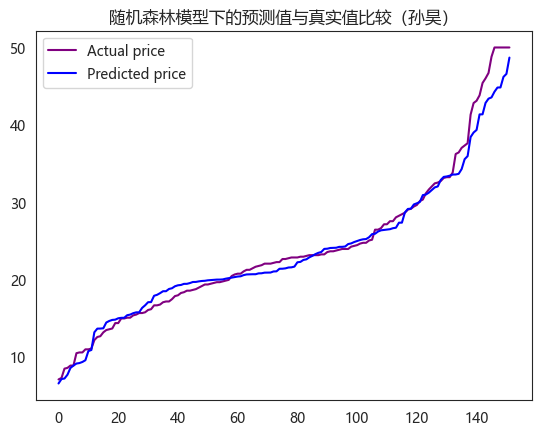

In [17]:
from sklearn.ensemble import RandomForestRegressor 
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
model = RandomForestRegressor(n_estimators=500)
#配置模型中回归树的个数为500
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

#可视化
y_t=sorted(y_test)
y_p=sorted(y_pred)
plt.plot(y_t[-200:],color='purple',label="Actual price")
plt.plot(y_p[-200:],color='b',label="Predicted price")
plt.title("随机森林模型下的预测值与真实值比较（孙昊）")
plt.legend()

print (model.score(X_test, y_test))

#### 6.3 采用梯度提升树建立回归模型

0.8996694247462308


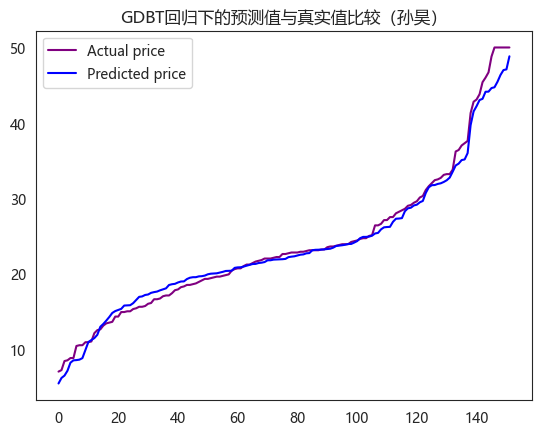

In [18]:
#导入相关库
from sklearn.ensemble import GradientBoostingRegressor
#配置GBDT回归模型的分类器个数
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
#采用测试数据集进行模型预测
y_pred=model.predict(X_test)

#可视化
y_t=sorted(y_test)
y_p=sorted(y_pred)
plt.plot(y_t[-200:],color='purple',label="Actual price")
plt.plot(y_p[-200:],color='b',label="Predicted price")
plt.title("GDBT回归下的预测值与真实值比较（孙昊）")
plt.legend()

print (model.score(X_test, y_test))



#### 6.4 采用最近邻算法建立回归模型

0.6868214026431004


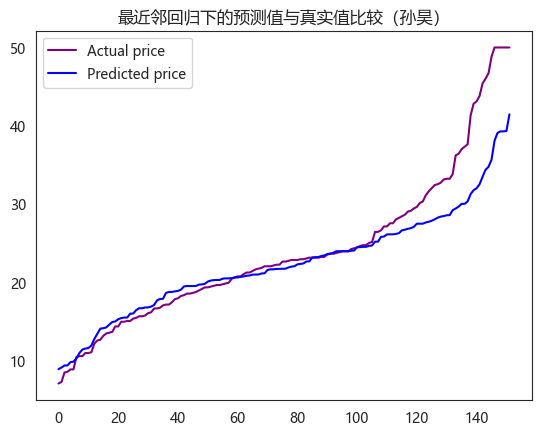

In [19]:
from sklearn.neighbors import KNeighborsRegressor
#配置最近邻回归模型参数
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

#可视化
y_t=sorted(y_test)
y_p=sorted(y_pred)
plt.plot(y_t[-200:],color='purple',label="Actual price")
plt.plot(y_p[-200:],color='b',label="Predicted price")
plt.title("最近邻回归下的预测值与真实值比较（孙昊）")
plt.legend()

print (model.score(X_test, y_test))

##### 上述结果显示，最近邻回归模型预测结果相对较差。

#### 6.5 采用决策树建立回归模型

0.7932135693714679


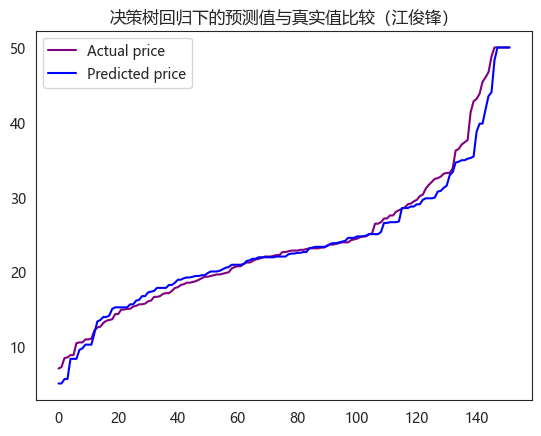

In [20]:
from sklearn.tree import DecisionTreeRegressor
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

#可视化
y_t=sorted(y_test)
y_p=sorted(y_pred)
plt.plot(y_t[-200:],color='purple',label="Actual price")
plt.plot(y_p[-200:],color='b',label="Predicted price")
plt.title("决策树回归下的预测值与真实值比较（江俊锋）")
plt.legend()

print (model.score(X_test, y_test))


0.7729565488793655


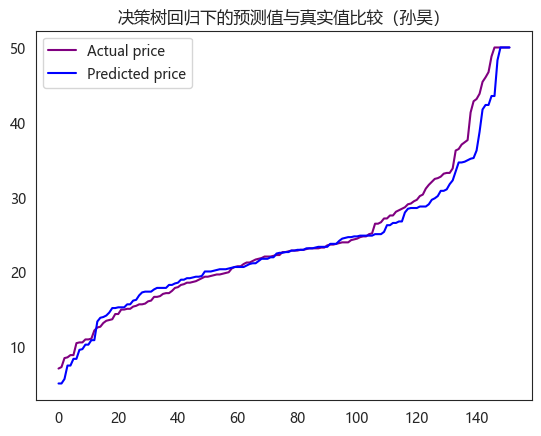

In [21]:
from sklearn.tree import DecisionTreeRegressor
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

#可视化
y_t=sorted(y_test)
y_p=sorted(y_pred)
plt.plot(y_t[-200:],color='purple',label="Actual price")
plt.plot(y_p[-200:],color='b',label="Predicted price")
plt.title("决策树回归下的预测值与真实值比较（孙昊）")
plt.legend()

print (model.score(X_test, y_test))


#### 6.6 采用LightGBM建立回归模型

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 354, number of used features: 12
[LightGBM] [Info] Start training from score 21.971186
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

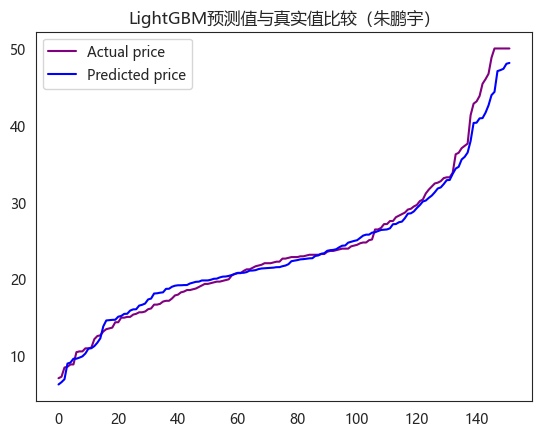

In [22]:
import lightgbm as lgb
from sklearn.metrics import r2_score

# 创建LightGBM回归模型
lgb_model = lgb.LGBMRegressor()

# 拟合训练数据
lgb_model.fit(X_train, y_train)

# 预测测试集
y_pred = lgb_model.predict(X_test)

# 计算R2得分
r2 = r2_score(y_test, y_pred)
print(r2)

# 绘制预测结果和实际结果的对比曲线
plt.plot(sorted(y_test)[-200:], color='purple', label="Actual price")
plt.plot(sorted(y_pred)[-200:], color='b', label="Predicted price")
plt.title("LightGBM预测值与真实值比较（朱鹏宇）")
plt.legend()
plt.show()

#### 最终采用梯度提升算法进行回归分析

In [23]:
#配置梯度提升树模型参数，树的棵数
model = GradientBoostingRegressor(n_estimators=500)
#采用训练数据进行模型训练
model.fit(X_train, y_train)
#采用测试数据进行模型预测
y_predicted = model.predict(X_test)
#导入模型结果评估模块平均绝对误差，均方根误差和r2值
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#计算平均绝对误差，均方根误差，r2模型值
mean_absolute_error(y_test,y_predicted)
mean_squared_error(y_test,y_predicted)
r2_score(y_test,y_predicted)
#输出平均绝对误差，均方根误差，r2模型值
print(r2_score(y_test,y_predicted))
print(mean_absolute_error(y_test,y_predicted))
print(mean_squared_error(y_test,y_predicted))

0.8941263523305562
2.397065798660345
10.336811370368572


###  7. 超参数优化
***
#### 可以看出该模型的模型评分最高，但是还有待提升，在测试集上的准确度和误差还有提升的空间，其可能出现过拟合现象。所以下面来调节其参数减小或者消除过拟合现象。

#### 7.1 loss 、min_samples_leaf、alpha参数调优

In [24]:
#使用随机搜素
model_gbr = GradientBoostingRegressor()
from sklearn.model_selection import RandomizedSearchCV
parameters1 = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
               'min_samples_leaf': [1,2,3,4,5],
              'alpha': [0.001 ,0.003, 0.01, 0.03, 0.1,0.3,0.6,0.9],'n_estimators':range(20,300,20)}
gsearch1 = RandomizedSearchCV(estimator=model_gbr, param_distributions=parameters1, cv=5)
gsearch1.fit(X_train,y_train)

print('Best score is:', gsearch1.best_score_)
print('Best parameter is:', gsearch1.best_params_)

Best score is: 0.8449039737891042
Best parameter is: {'n_estimators': 160, 'min_samples_leaf': 3, 'loss': 'squared_error', 'alpha': 0.003}


#### 7.2 max_depth和min_samples_split参数调优

In [25]:
#使用网格搜素

from sklearn.model_selection import GridSearchCV
model_gbr = GradientBoostingRegressor(n_estimators=180,alpha=0.6,
loss='squared_error',min_samples_leaf=2)
parameters2 = {'max_depth':range(3,14,2), 'min_samples_split':range(2,600,50)}
gsearch2 = GridSearchCV(estimator=model_gbr, param_grid=parameters2,cv=5)
gsearch2.fit(X_train,y_train)

print('Best score is:', gsearch2.best_score_)
print('Best parameter is:', gsearch2.best_params_)

Best score is: 0.8524783417584343
Best parameter is: {'max_depth': 3, 'min_samples_split': 52}


#### 7.3 min_samples_split和min_samples_leaf参数调优

In [26]:
from sklearn.model_selection import GridSearchCV

model_gbr = GradientBoostingRegressor(n_estimators=180,alpha=0.6,
loss='squared_error',max_depth=3)
parameter3 = {'min_samples_split':range(2,20,2), 'min_samples_leaf':range(1,81,5)}
gsearch3 = GridSearchCV(estimator=model_gbr, param_grid= parameter3,cv=5)
gsearch3.fit(X_train,y_train)

print('Best score is:', gsearch3.best_score_)
print('Best parameter is:', gsearch3.best_params_)

Best score is: 0.8543353422949084
Best parameter is: {'min_samples_leaf': 1, 'min_samples_split': 8}


#### 7.4 max_features调优

In [27]:
from sklearn.model_selection import GridSearchCV

model_gbr = GradientBoostingRegressor(n_estimators=180,alpha=0.6,
loss='squared_error',min_samples_leaf=5,max_depth=3,min_samples_split=12)
parameters4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator=model_gbr, param_grid= parameters4,cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.fit(X_train,y_train)

print('Best score is:', gsearch4.best_score_)
print('Best parameter is:', gsearch4.best_params_)

Best score is: 0.8448805940770786
Best parameter is: {'max_features': 7}


#### 7. 5 最终优化模型-GDBT梯度提升树回归模型

0.8832640665672956
2.4277138574325234
11.397333997646195


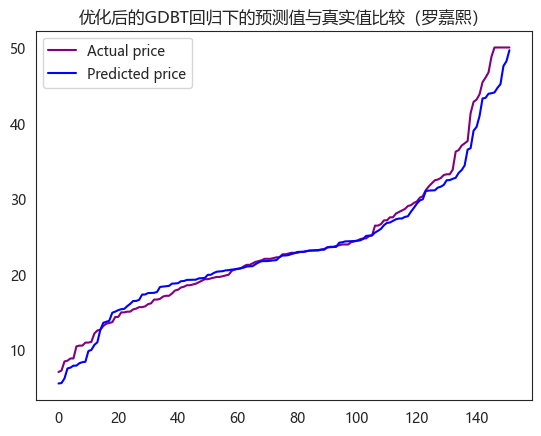

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=180,alpha=0.6,
loss='squared_error',min_samples_leaf=5,max_depth = 3,
min_samples_split = 12,max_features=7)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

#可视化
y_t=sorted(y_test)
y_p=sorted(y_pred)
plt.plot(y_t[-200:],color='purple',label="Actual price")
plt.plot(y_p[-200:],color='b',label="Predicted price")
plt.title("优化后的GDBT回归下的预测值与真实值比较（罗嘉熙）")
plt.legend()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print(model.score(X_test, y_test))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
